<a href="https://colab.research.google.com/github/syedshahlal/Understanding_Computer_Vision/blob/main/CNN_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = '/content/car1.jpeg'

In [3]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  try:
    cv2.imshow("display", img) # This works on your local PC
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow # This is on your colab
    cv2_imshow(img)
    return img

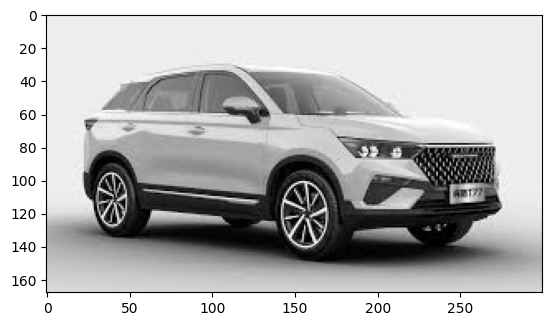

In [8]:
car=read_img(path, grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



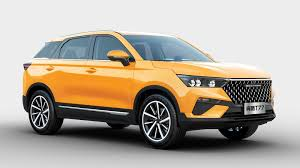

In [9]:
color_car=read_img(path, grayscale=False)


In [10]:
car.shape

(168, 300)

In [11]:
color_car.shape

(168, 300, 3)

In [12]:
row, col = car.shape
batch = 1 #single image is there
ch=1  #grayscale
reshaped_car_img = car.reshape(batch, row, col, ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [23]:
input_shape=reshaped_car_img.shape[1:]
CONV_LAYERS = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYERS)
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
out=conv_model.predict(reshaped_car_img)

1/1 [==============================] - 0s 36ms/step


In [25]:
out.shape

(1, 166, 298, 1)

In [26]:
_, row, col,_ = out.shape

In [27]:
reshape_out = out.reshape(row,col)

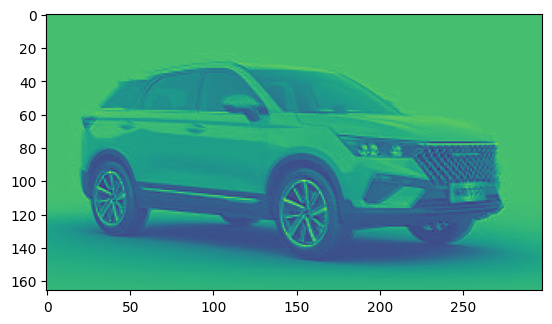

In [28]:
plt.imshow(reshape_out)